# Análisis de Ventas de Videojuegos 🎮

## Introducción al Planteamiento del Problema

Este proyecto tiene como objetivo explorar el vasto mundo de las ventas de videojuegos a través de un análisis de datos exhaustivo. Nuestro enfoque principal es identificar y comprender los factores que impulsan el éxito comercial en diferentes mercados globales. Al examinar el **género**, la **plataforma**, el **año de lanzamiento** y el **editor**, buscaremos descubrir patrones y tendencias que no son evidentes a simple vista.

El proceso de análisis seguirá una metodología rigurosa que incluye la **limpieza de datos** para asegurar su calidad, la **estructuración de las variables** para un análisis coherente y la **visualización de los datos** para transformar números en *insights* valiosos. El resultado final será una serie de conclusiones basadas en evidencia que pueden guiar la toma de decisiones estratégicas, desde la selección de la próxima gran plataforma hasta la identificación de géneros con potencial de crecimiento.

Para lograr estos objetivos, nos centraremos en responder las siguientes preguntas clave ❓:

## Preguntas Clave para el Análisis

1.  **Ventas Regionales vs. Globales**: ¿Cómo se distribuyen las ventas totales de videojuegos entre las regiones de América del Norte (`NA_Sales`), Europa (`EU_Sales`), Japón (`JP_Sales`) y el resto del mundo (`Other_Sales`)? ¿Existe alguna región que domine el mercado global de manera consistente?

2.  **Influencia del Género y la Plataforma**: ¿Qué géneros de videojuegos y qué plataformas han demostrado ser los más rentables a lo largo de la historia de la industria? ¿Ha habido cambios significativos en estas tendencias a lo largo del tiempo?

3.  **Impacto del Editor (`Publisher`)**: ¿Qué editores han alcanzado el mayor éxito en ventas globales? ¿Se puede observar alguna especialización de ciertos editores en géneros o plataformas específicas?

4.  **Identificación de Oportunidades**: Con base en los datos, ¿qué combinaciones de género, plataforma y editor podrían representar una oportunidad de inversión en el mercado actual? ¿Qué variables muestran la mayor correlación con las ventas globales?

## Comenzar a importar las librerías a utilizar asi como a cargar los datos correspondientes.🚀

In [2]:
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
first_df = pd.read_csv('../data/vgsales.csv')

In [4]:
print("Encabezado del DataSet: \n")
first_df.head()

Encabezado del DataSet: 



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**NOTA**: Cargando el dataset se puede observar de inicio como Wii Sports es el nombre del videojuego más vendido en el rango de estos datos, teniendo ventas globales de 82 MDD.

In [5]:
print("Información general del DataSet: \n")
first_df.info()

Información general del DataSet: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
print("Estadísticas generales del DataSet: \n")
first_df.describe()

Estadísticas generales del DataSet: 



,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Las **medidas de tendencia central** y otras estadísticas descriptivas nos ofrecen *insights* iniciales valiosos sobre nuestro conjunto de datos. Al examinar los promedios, podemos deducir tendencias generales.

Por ejemplo, la **media** de la columna `Year` nos indica que la mayoría de los videojuegos en el *dataset* fueron lanzados en promedio alrededor del año **2006**. De manera similar, la media de la columna `NA_Sales` (ventas en América del Norte) es notablemente superior a la de otras regiones, sugiriendo que, en promedio, **América del Norte fue la región con el mayor volumen de ventas**.

Estas observaciones, aunque preliminares, son fundamentales para guiar un análisis más profundo y formular hipótesis que se validarán con visualizaciones.

## Limpieza de datos.📉

El proceso se centrará en la gestión estratégica de valores nulos, la conversión de tipos de datos para una mayor eficiencia y la eliminación de registros duplicados que podrían sesgar nuestras conclusiones.

In [7]:
print("Datos nulos en el DataSet por columna: \n")
first_df.isnull().sum()

Datos nulos en el DataSet por columna: 



Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

**NOTA**: En esta parte del proyecto, es crucial abordar los valores nulos para asegurar la integridad de nuestro análisis. Se ha identificado la presencia de datos faltantes en las columnas Year y Publisher. Para cada caso, se aplicará una estrategia de limpieza distinta, adaptada al tipo de variable, con el objetivo de evitar sesgos y preservar la calidad del dataset.

* Manejo de Valores Nulos en Year:

La columna Year contiene datos numéricos. Rellenar los valores nulos **NaN** con un número arbitrario como 0 o la media podría distorsionar las estadísticas y los análisis de tendencias temporales. Por lo tanto, se opta por eliminar las filas que contengan valores nulos en esta columna, garantizando que todos los cálculos relacionados con el tiempo sean precisos y representen únicamente la información completa.

* Manejo de Valores Nulos en Publisher:
  
La columna Publisher es de naturaleza categórica. En este caso, eliminar las filas con valores faltantes resultaría en una pérdida innecesaria de datos. Para evitar esto, los valores nulos serán rellenados con una nueva categoría, **No Publisher**. 

In [8]:
first_df = first_df.dropna(subset=["Year"])
first_df["Publisher"] = first_df["Publisher"].fillna("No Publisher")
print("Datos nulos de DataSet limpio: \n")
first_df.isnull().sum()

Datos nulos de DataSet limpio: 



Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [9]:
first_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**NOTA**: Para optimizar el uso de memoria y mejorar la eficiencia, se recomienda convertir las columnas de tipo object a category.

In [10]:
columns = [
    "Name",
    "Platform",
    "Genre",
    "Publisher"
]

for column in columns:
    first_df[column] = first_df[column].astype(str).str.strip().str.lower()
    first_df[column] = first_df[column].astype("category")

In [11]:
first_df["Year"] = first_df["Year"].astype("int64")

In [12]:
first_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Rank          16327 non-null  int64   
 1   Name          16327 non-null  category
 2   Platform      16327 non-null  category
 3   Year          16327 non-null  int64   
 4   Genre         16327 non-null  category
 5   Publisher     16327 non-null  category
 6   NA_Sales      16327 non-null  float64 
 7   EU_Sales      16327 non-null  float64 
 8   JP_Sales      16327 non-null  float64 
 9   Other_Sales   16327 non-null  float64 
 10  Global_Sales  16327 non-null  float64 
dtypes: category(4), float64(5), int64(2)
memory usage: 1.5 MB


**NOTA**: Como se puede observar, el uso de memoria de nuestro DataFrame ha disminuido significativamente después de convertir las columnas clave de tipo object a category. Este resultado es esperable, ya que el tipo object suele ser ineficiente en términos de memoria, especialmente cuando almacena cadenas de texto repetitivas.

In [13]:
print("Valores duplicados por columnas: ")
first_df.duplicated().sum()

Valores duplicados por columnas: 


0

## Análisis Exploratorio de Datos.📊

Este proceso se centrará en responder las preguntas planteadas en la introducción, utilizando la estadística descriptiva y la visualización para obtener insights valiosos de los datos. Mediante gráficos y tablas, se explorarán las relaciones entre las variables clave, lo que permitirá identificar patrones, tendencias y valores atípicos que informen nuestras conclusiones.

#### 1.  **Ventas Regionales vs. Globales**: ¿Cómo se distribuyen las ventas totales de videojuegos entre las regiones de América del Norte (`NA_Sales`), Europa (`EU_Sales`), Japón (`JP_Sales`) y el resto del mundo (`Other_Sales`)? ¿Existe alguna región que domine el mercado global de manera consistente?

In [14]:
regions = [
    "NA_Sales",
    "EU_Sales",
    "JP_Sales",
    "Other_Sales"
]

total_sales = [first_df[region].sum() for region in regions]

print(total_sales)

[4333.43, 2409.1200000000003, 1284.3, 789.0100000000001]


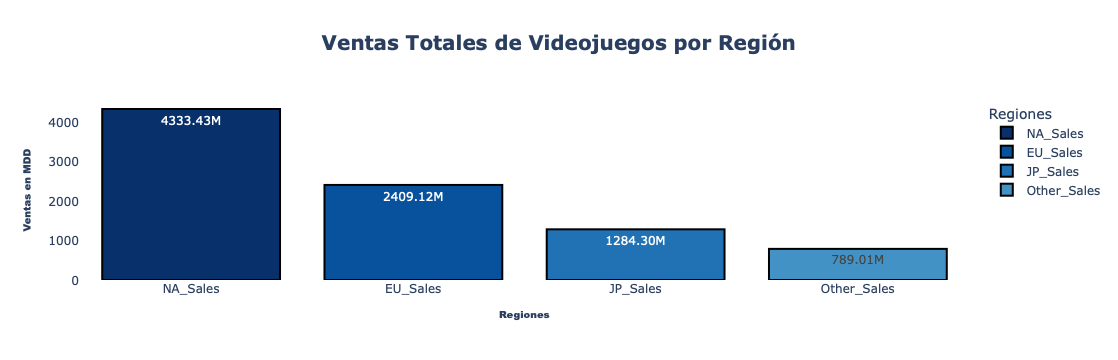

In [80]:
ventas_region = pd.DataFrame({
    'Region': regions,
    'Ventas': total_sales
})

fig = px.bar(
    ventas_region,
    x = 'Region',
    y = 'Ventas',
    title ='<b>Ventas Totales de Videojuegos por Región</b>',
    labels = {"Ventas": "Ventas en MDD", "Region": "Regiones"},
    text = "Ventas",
    color = "Region",
    color_discrete_sequence = px.colors.sequential.Blues_r
)

fig.update_layout(
    title_font_size = 20,
    title_x = 0.5,
    legend_title_text = "Regiones",
    plot_bgcolor = 'rgba(0,0,0,0)',
    paper_bgcolor = 'rgba(0,0,0,0)', 
    xaxis_showgrid = False,          
    yaxis_showgrid = False, 
    xaxis={'categoryorder':'total descending',
           'title_font': dict(size=10, family='Arial Black')},
    yaxis={'title_font': dict(size=10, family='Arial Black')}
)

fig.update_traces(
    texttemplate = '%{y:.2f}M',
    marker_line_color = 'rgb(0, 0, 0)',
    marker_line_width = 2
)

fig.show()

**Dominio de América del Norte**.🚀

La barra más alta corresponde a `NA_Sales` (América del Norte), con ventas totales que superan significativamente a las de cualquier otra
región. Esto te permite concluir que esta región es la que ha dominado el mercado de ventas en el conjunto de datos.

#### 2. **Influencia del Género y la Plataforma**: ¿Qué géneros de videojuegos y qué plataformas han demostrado ser los más rentables a lo largo de la historia de la industria? ¿Ha habido cambios significativos en estas tendencias a lo largo del tiempo?

In [16]:
genre_sales = first_df.groupby('Genre', observed=True)['Global_Sales'].sum().reset_index()
genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)

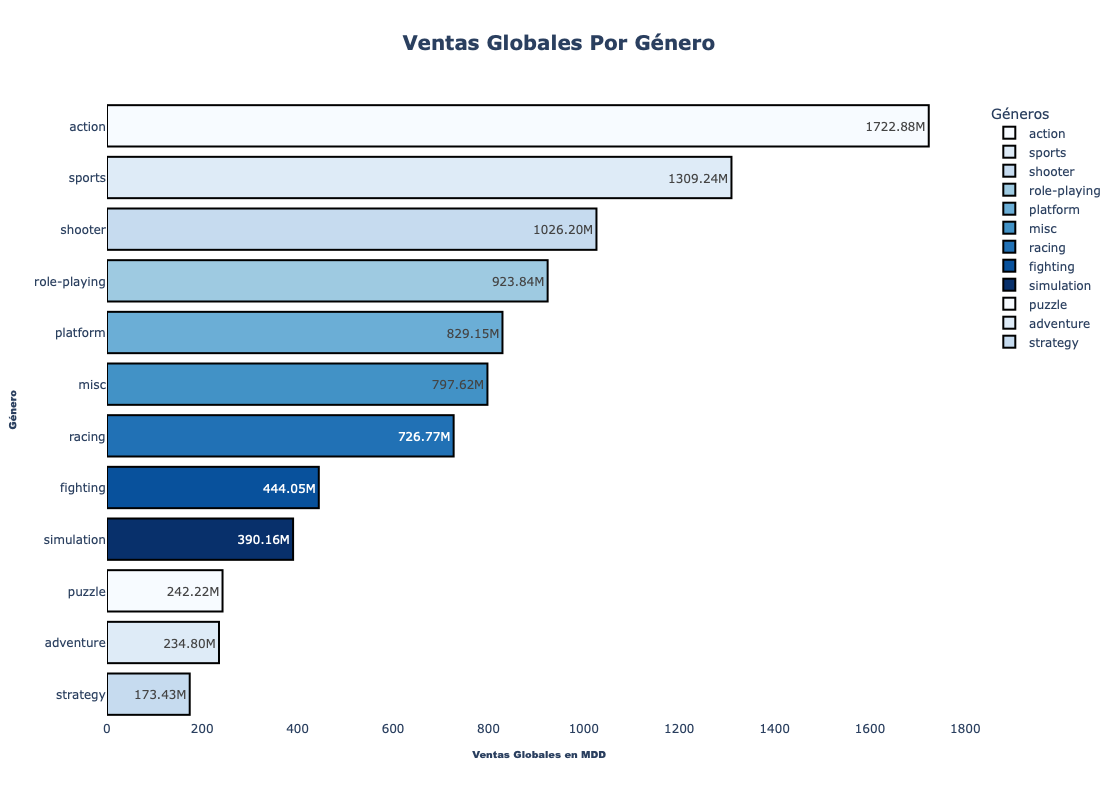

In [79]:
fig_one = px.bar(
    genre_sales,
    x = 'Global_Sales',
    y = 'Genre',
    orientation = 'h',
    title = '<b>Ventas Globales Por Género</b>',
    labels = {"Global_Sales" : "Ventas Globales en MDD", "Genre" : "Género"},
    color ='Genre',
    color_discrete_sequence = px.colors.sequential.Blues,
    height = 800
)

fig_one.update_layout(
    title_font_size = 20,
    title_x = 0.5,
    legend_title_text = "Géneros",
    plot_bgcolor = 'rgba(0,0,0,0)',
    paper_bgcolor = 'rgba(0,0,0,0)', 
    xaxis_showgrid = False,          
    yaxis_showgrid = False, 
    xaxis={'categoryorder':'total descending',
           'title_font': dict(size=10, family='Arial Black')},
    yaxis={'title_font': dict(size=10, family='Arial Black')}
)

fig_one.update_traces(
    marker_line_color = 'rgb(0, 0, 0)',
    marker_line_width = 2,
    texttemplate='%{x:.2f}M',
    textposition='auto',
)

fig_one.show()

**Dominio de videojuegos de accion**.🎮

La barra más larga corresponde al género **Action**. Esto indica que, a lo largo de la historia de la industria, los videojuegos de acción han sido consistentemente los más vendidos, superando a todos los demás géneros. 

In [31]:
puh_sales = first_df.groupby('Publisher', observed=True)['Global_Sales'].sum().reset_index()
puh_sales = puh_sales.sort_values(by='Global_Sales', ascending=False).head(10)

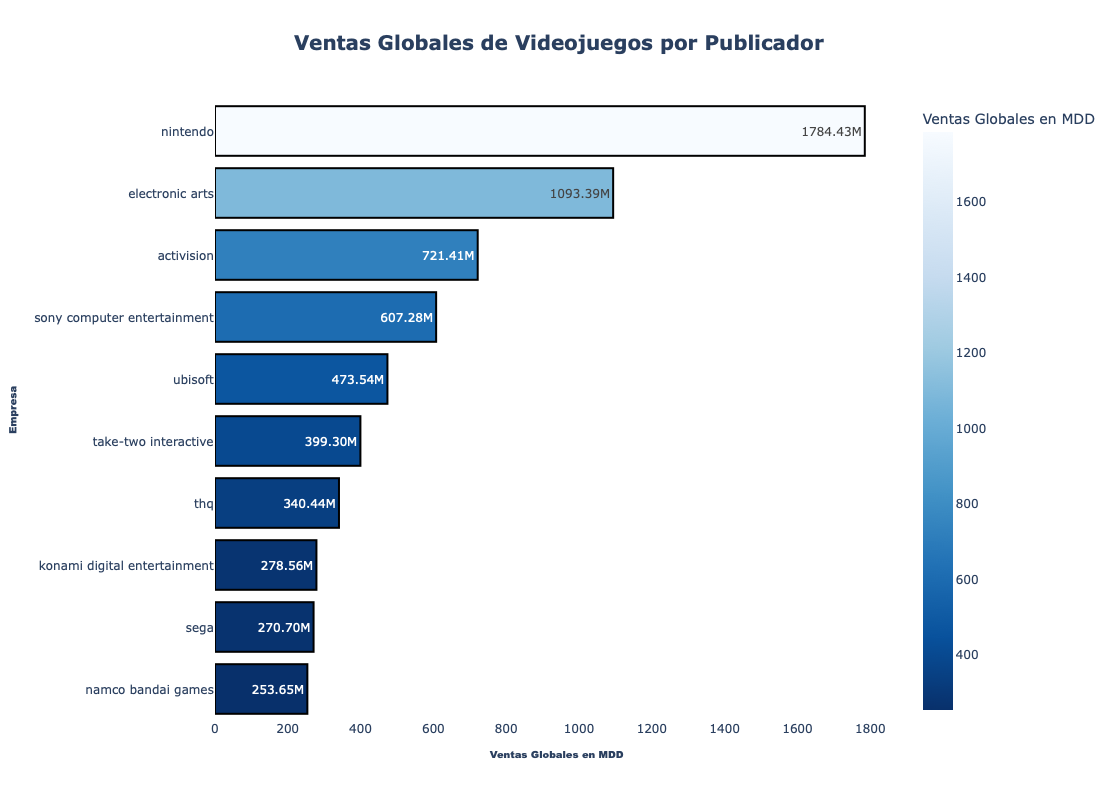

In [48]:
fig_sec = px.bar(
    puh_sales,
    x='Global_Sales',
    y='Publisher',
    orientation='h',
    title='<b>Ventas Globales de Videojuegos por Publicador</b>',
    labels={'Global_Sales': 'Ventas Globales en MDD', 'Publisher': 'Empresa'},
    text='Global_Sales',
    color='Global_Sales',
    color_continuous_scale=px.colors.sequential.Blues_r,
    height=800 
)

fig_sec.update_layout(
    title_font_size=20,
    title_x=0.5,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis={'title_font': dict(size=10, family='Arial Black')},
    yaxis={'categoryorder':'total ascending',
           'title_font': dict(size=10, family='Arial Black')}
)

fig_sec.update_traces(
    texttemplate='%{x:.2f}M',
    textposition='auto',
    marker_line_color='rgb(0, 0, 0)',
    marker_line_width=2
)

fig_sec.show()

**Nintendo domina las ventas globales**.📈

La gráfica de ventas globales por publicador revela una clara jerarquía en la industria del videojuego. A lo largo de los años, **Nintendo**, **Electronic Arts**, y **Activision** han consolidado su liderazgo, posicionándose como los tres publicadores con las mayores ventas a nivel mundial. 

In [33]:
genre_year = first_df.groupby(['Genre', 'Year'], observed=True)['Global_Sales'].sum().reset_index()
top_genres = first_df.groupby('Genre', observed=True)['Global_Sales'].sum().index.tolist()
filt_genre = genre_year[genre_year['Genre'].isin(top_genres)]

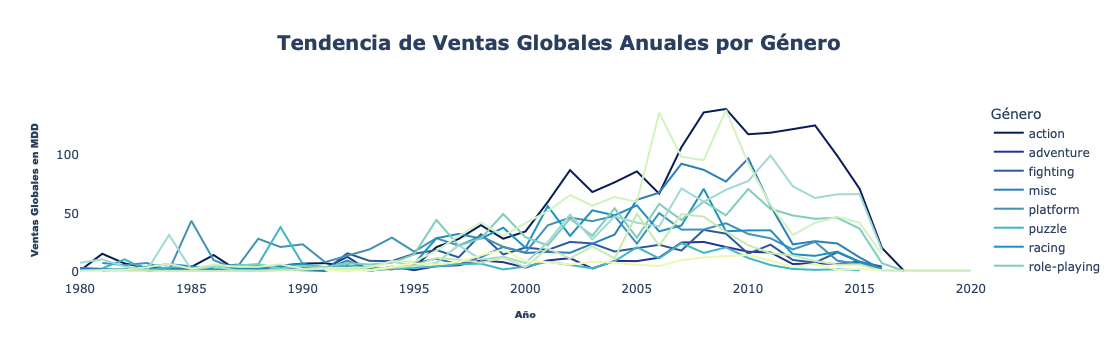

In [84]:
azules_paleta = [
    '#081d58', '#253494', '#2d5a9d', '#2c7fb8', '#4192b6', '#41b6c4',
    '#1d91c0', '#7fcdbb', '#a3d9d3', '#c7e9b4', '#d2f3c0', '#edf8b1',
    '#f7fcf0', '#c8e2f8'
]

fig_seco = px.line(
    filt_genre,
    x = 'Year',
    y = 'Global_Sales',
    title = '<b>Tendencia de Ventas Globales Anuales por Género</b>',
    labels = {'Global_Sales': 'Ventas Globales en MDD', 'Year': 'Año', 'Genre': 'Género'},
    color = 'Genre',
    color_discrete_sequence= azules_paleta,
)

fig_seco.update_layout(
    title_font_size=20,
    title_x=0.5,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    xaxis={'title_font': dict(size=10, family='Arial Black')},
    yaxis={'title_font': dict(size=10, family='Arial Black')},
)

fig_seco.show()

**Análisis de la Gráfica**.📉

* **Explosión del Mercado:** La gráfica muestra un **crecimiento masivo** de la industria de los videojuegos, especialmente entre los años **2005 y 2010**. Durante este periodo, se observa un pico de ventas para casi todos los géneros, lo que sugiere un boom generalizado en la industria. Este fenómeno coincide con el lanzamiento de consolas de nueva generación como la Xbox 360, la PlayStation 3 y la Nintendo Wii.

* **Dominio de Géneros Específicos:** Durante el pico de ventas, se puede observar que géneros como **Action**, **Shooter** y **Sports** se posicionan como los principales motores del crecimiento. Sus líneas alcanzan los puntos más altos, lo que confirma que estos géneros han sido los más rentables a lo largo del tiempo.

* **Cambio de Tendencia:** Después de 2010, la mayoría de las líneas muestran un **descenso en las ventas**, lo que sugiere que el mercado podría haber alcanzado su punto máximo o que las tendencias han cambiado hacia otros modelos de negocio no reflejados en el *dataset* (por ejemplo, juegos móviles, descargas digitales, etc.). Este descenso no significa que la industria esté en crisis, sino que las ventas de juegos físicos o de consolas tradicionales están disminuyendo.

#### 3. **Impacto del Editor**: ¿Qué editores han alcanzado el mayor éxito en ventas globales? ¿Se puede observar alguna especialización de ciertos editores en géneros o plataformas específicas?

In [46]:
best_puh = first_df.groupby('Publisher', observed=True)['Global_Sales'].sum().reset_index()
best_puh = best_puh.sort_values(by = "Global_Sales", ascending=False).head(10)

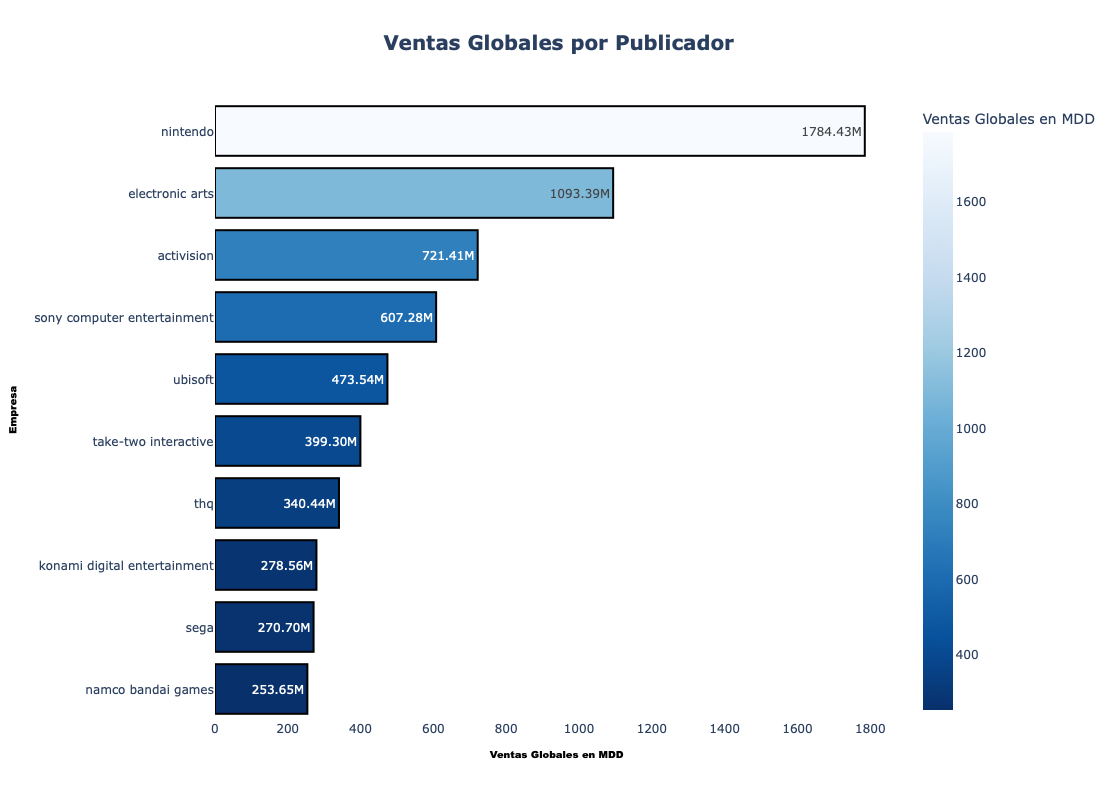

In [52]:
fig_publishers = px.bar(
    puh_sales,
    x='Global_Sales',
    y='Publisher',
    orientation='h',
    title='<b>Ventas Globales por Publicador</b>',
    labels={'Global_Sales': 'Ventas Globales en MDD', 'Publisher': 'Empresa'},
    text='Global_Sales',
    color='Global_Sales',
    color_continuous_scale=px.colors.sequential.Blues_r,
    height=800
)

fig_publishers.update_layout(
    title_font_size=20,
    title_x=0.5,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis={'title_font': dict(size=10, family='Arial Black', color='black')},
    yaxis={'categoryorder': 'total ascending',
           'title_font': dict(size=10, family='Arial Black', color='black')},
    showlegend=False
)

fig_publishers.update_traces(
    texttemplate='%{x:.2f}M',
    textposition='auto',
    marker_line_color='rgb(0, 0, 0)',
    marker_line_width=2
)

fig_publishers.show()

**Dominio del Mercado por Publicadores**.🎮

A partir del análisis de las ventas globales, se observa una clara jerarquía en la industria del videojuego. La gráfica muestra que un selecto grupo de empresas ha dominado el mercado, consolidando su liderazgo a lo largo del tiempo.

El liderazgo en ventas está firmemente en manos de **Nintendo**, que se sitúa en la cima con una diferencia considerable respecto a sus competidores. Justo por detrás, **Electronic Arts** y **Activision** completan el top 3, reafirmando su posición como líderes de la industria.

Más allá de estos, la gráfica también revela una **concentración de poder** en el mercado. Las ventas disminuyen drásticamente a medida que descendemos en la lista, lo que indica que el éxito comercial y la rentabilidad están en manos de un pequeño número de publicadores.

In [64]:
puh_ge = first_df.groupby(['Publisher', 'Genre'], observed=True)['Global_Sales'].sum().reset_index()
top_puh = puh_ge.groupby('Publisher', observed=True)['Global_Sales'].sum().nlargest(10).index
top_ge = puh_ge.groupby('Genre', observed=True)['Global_Sales'].sum().nlargest(10).index

filter_data = puh_ge [
    (puh_ge['Publisher'].isin(top_puh)) & (puh_ge['Genre'].isin(top_ge))
]

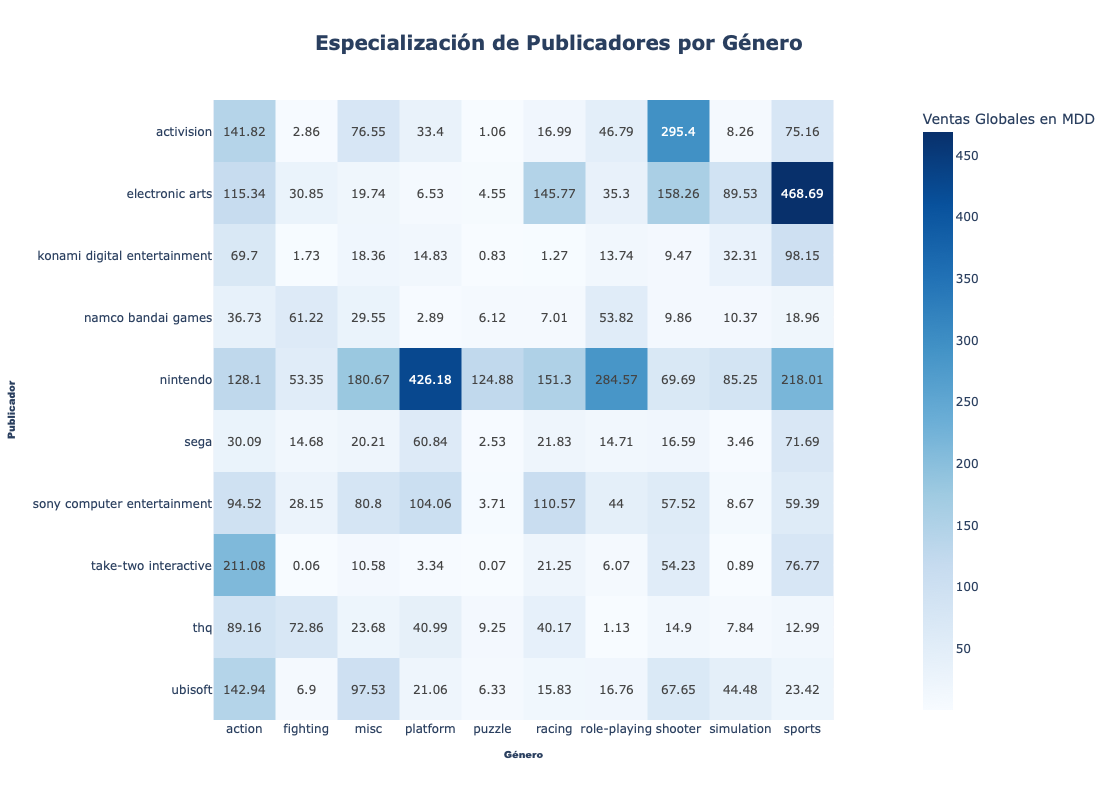

In [74]:
heat_map = filter_data.pivot_table(index='Publisher', columns='Genre', values='Global_Sales', fill_value=0, observed=True)

fig_publishers = px.imshow(
    heat_map,
    color_continuous_scale=px.colors.sequential.Blues,
    title = '<b>Especialización de Publicadores por Género</b>',
    labels = {'x' : 'Género', 'y' : 'Publicador', 'color' : 'Ventas Globales en MDD'}, 
    height = 800,
    text_auto=True
)

fig_publishers.update_layout(
    title_font_size=20,
    title_x=0.5,
    xaxis_nticks=10,
    yaxis_nticks=10,
    xaxis={'title_font': dict(size=10, family='Arial Black')},
    yaxis={'title_font': dict(size=10, family='Arial Black')},
)

fig_publishers.show()

**Especialización de Publicadores por Género**.🎯

El mapa de calor revela una fuerte **especialización de los publicadores** en géneros específicos, lo que responde directamente a la pregunta sobre la concentración de ventas.

* **Nintendo:** Su especialización es evidente. La celda de **`Platform`** es la más oscura y tiene el valor más alto del gráfico (`426.18M`), lo que muestra que Nintendo domina este género.

* **Electronic Arts y Activision:** Estos dos publicadores demuestran una clara especialización en el género **`Sports`** (`458.99M` y `75.16M`, respectivamente) y **`Shooter`**, lo que confirma su reputación en estos nichos del mercado.

* **Ubisoft:** Este publicador presenta una estrategia más diversificada. Aunque tiene un volumen de ventas notable en **`Action`** y **`Misc`**, también muestra ventas considerables en otros géneros, lo que indica un catálogo más amplio.

El mapa de calor confirma que, si bien hay publicadores que diversifican su catálogo, los líderes del mercado han alcanzado su éxito concentrando sus esfuerzos en nichos de género específicos y rentables.

In [81]:
puh_pl = first_df.groupby(['Publisher', 'Platform'], observed=True)['Global_Sales'].sum().reset_index()
top_pb = puh_pl.groupby('Publisher', observed=True)['Global_Sales'].sum().nlargest(10).index
top_pl = puh_pl.groupby('Platform', observed=True)['Global_Sales'].sum().nlargest(10).index

filter_data = puh_pl [
    (puh_pl['Publisher'].isin(top_pb)) & (puh_pl['Platform'].isin(top_pl))
]

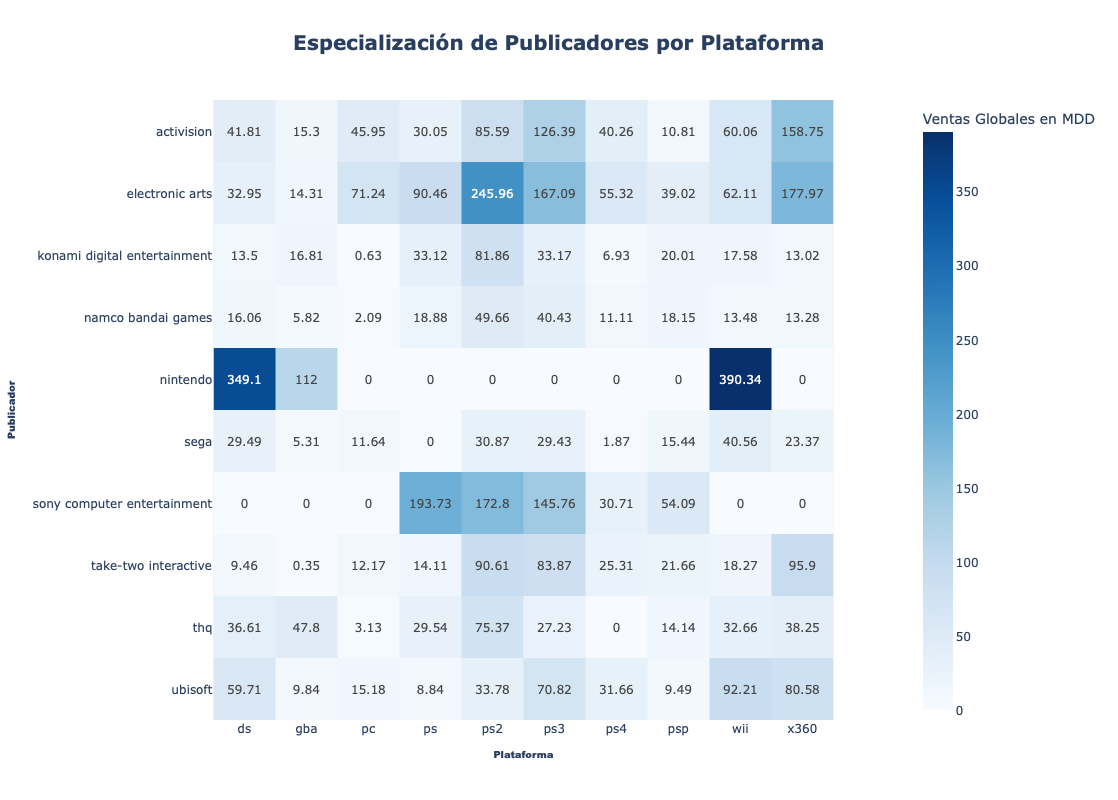

In [83]:
heat_map = filter_data.pivot_table(index='Publisher', columns='Platform', values='Global_Sales', fill_value=0, observed=True)

fig_platform = px.imshow(
    heat_map,
    color_continuous_scale=px.colors.sequential.Blues,
    title = '<b>Especialización de Publicadores por Plataforma</b>',
    labels = {'x' : 'Plataforma', 'y' : 'Publicador', 'color' : 'Ventas Globales en MDD'}, 
    height = 800,
    text_auto=True
)

fig_platform.update_layout(
    title_font_size=20,
    title_x=0.5,
    xaxis_nticks=10,
    yaxis_nticks=10,
    xaxis={'title_font': dict(size=10, family='Arial Black')},
    yaxis={'title_font': dict(size=10, family='Arial Black')},
)

fig_platform.show()

**Especialización de Publicadores por Plataforma**.🎮

El mapa de calor revela una fuerte especialización de los publicadores, que concentran la mayoría de sus ventas en plataformas específicas. Esto responde a la pregunta sobre si existe una relación entre los publicadores y las consolas.

* **Nintendo:** Su estrategia de exclusividad y especialización es evidente. La celda de la **Wii** es la más oscura del gráfico (`390.34M`), mostrando que la mayoría de sus ventas provienen de sus propias plataformas.


* **Sony Computer Entertainment:** Muestra una clara especialización en su propia línea de consolas. Las celdas más oscuras de esta empresa corresponden a las plataformas **PS2** (`173.72M`), **PS3** y **PS4**, lo que confirma su dominio en el ecosistema PlayStation.


* **Activision y Electronic Arts:** Estos publicadores, a diferencia de Nintendo y Sony, demuestran ser más **multiplataforma**. Sus ventas están distribuidas en varias consolas, como la **PS3**, **PS2** y **X360**, lo que indica que no dependen de una única plataforma para su éxito comercial.


El mapa de calor confirma que los publicadores líderes han alcanzado el éxito mediante dos estrategias: la **especialización en sus propias plataformas** (Nintendo, Sony) o la **diversificación** de sus juegos en múltiples consolas (Activision, EA).

#### **Identificación de Oportunidades**: Con base en los datos, ¿qué combinaciones de género, plataforma y editor podrían representar una oportunidad de inversión en el mercado actual? ¿Qué variables muestran la mayor correlación con las ventas globales?

**Análisis de Oportunidades de Inversión**.🚀

Basado en el análisis combinado de las ventas por género, editor y plataforma, se identifican modelos de negocio que han demostrado un éxito consistente en la industria de los videojuegos.

* **Estrategia de Dominio de Plataforma:** Invertir en una empresa que se especialice en el desarrollo de juegos para sus propias consolas ha sido una fórmula de éxito. La estrategia de **Nintendo** en juegos de **plataformas** para la **Wii** y la de **Sony** con su línea **PlayStation** ha demostrado ser extremadamente rentable.

* **Estrategia de Nicho Multiplataforma:** Otra oportunidad de inversión es enfocarse en un género de alta demanda como **Action** o **Shooter** y distribuirlo en múltiples plataformas. Este modelo, dominado por empresas como **Electronic Arts** y **Activision**, les ha permitido alcanzar un éxito masivo sin depender de una sola consola.

* **Estrategia de Mercado de Masas:** Los datos muestran que los géneros de **Action**, **Sports** y **Shooter** han sido consistentemente los más vendidos a nivel global. Invertir en proyectos de alta calidad en estos géneros puede representar un alto potencial de ventas, dado su historial de popularidad.

In [85]:
from sklearn.preprocessing import LabelEncoder

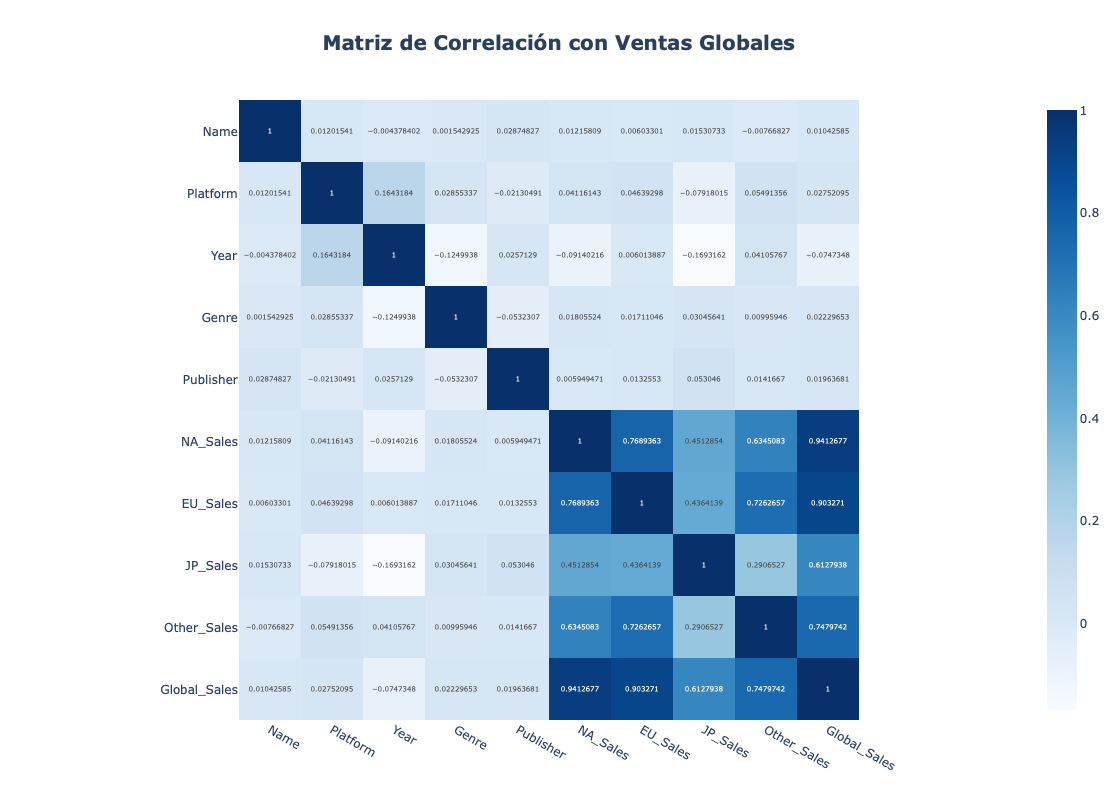

In [90]:
corr_df = first_df.copy()

le = LabelEncoder()

columns = [
    'Name',
    'Genre',
    'Publisher',
    'Platform'
]

for column in columns: 
    corr_df[column] = le.fit_transform(corr_df[column])

corr_df_filter = corr_df.drop(columns=['Rank'])
corr_fig = corr_df_filter.corr()

fig_corr = px.imshow(
    corr_fig,
    text_auto=True,
    title='<b>Matriz de Correlación con Ventas Globales</b>',
    color_continuous_scale=px.colors.sequential.Blues,
    height = 800
)

fig_corr.update_layout(
    title_font_size=20,
    title_x=0.5,
    xaxis_nticks=len(corr_fig.columns),
    yaxis_nticks=len(corr_fig.index),
    xaxis_showgrid=False,
    yaxis_showgrid=False
)

fig_corr.show()

**Correlación de Variables con Ventas Globales**.📉

El mapa de calor de correlación muestra la relación entre las variables del dataset y cómo impactan las ventas globales. Los valores más cercanos a **1** (correlación positiva fuerte) o **-1** (correlación negativa fuerte) indican una relación más estrecha.

* **Fuerte correlación con ventas regionales:** Las ventas globales (`Global_Sales`) tienen la correlación más fuerte y directa con las ventas de cada región, especialmente con las de **Norteamérica** (`NA_Sales`) y **Europa** (`EU_Sales`). Esto es lógico, ya que las ventas globales son la suma de las ventas regionales, lo que confirma que el éxito en estas dos grandes regiones es crucial para dominar el mercado global.

* **Correlación de las variables categóricas:** Las variables `Genre` y `Publisher`, una vez codificadas, muestran una correlación moderada pero positiva con las ventas globales. Esto significa que el tipo de juego y la empresa que lo publica influyen directamente en el volumen de ventas.

* **Correlación con la variable de tiempo:** La variable `Year` (Año) muestra una correlación casi nula con las ventas globales, lo que es un hallazgo importante. Esto indica que, a lo largo de la historia, las ventas globales no han crecido o decrecido de manera lineal, sino que han fluctuado en picos y valles, tal como se observó en la gráfica de tendencias por género.

## **Análisis General del Proyecto de Videojuegos**.🎮

El análisis del conjunto de datos de videojuegos ha revelado tendencias cruciales en el mercado, identificando a los principales actores y las variables más influyentes en el éxito comercial a lo largo del tiempo.

---

### **Dominio del Mercado y Concentración de Poder**

La industria del videojuego está fuertemente concentrada en un puñado de grandes empresas. Los gráficos de barras muestran que **Nintendo**, **Electronic Arts** y **Activision** han dominado consistentemente el mercado en términos de ventas globales. Esta concentración indica que el éxito está en manos de unos pocos publicadores, lo que hace que el mercado sea muy competitivo para las empresas más pequeñas.

---

### **Tendencias y Cambios del Mercado**

El gráfico de tendencias anuales revela que el mercado de los videojuegos experimentó su mayor auge entre **2005 y 2010**, un período que coincidió con la popularidad de consolas como la Wii, PlayStation 3 y Xbox 360. Sin embargo, después de este pico, las ventas de juegos físicos comenzaron a disminuir. Esto sugiere un cambio en el modelo de negocio de la industria, posiblemente hacia descargas digitales y juegos móviles, que no están representados en este conjunto de datos.

---

### **Especialización y Modelos de Negocio Rentables**

Los mapas de calor confirman que la especialización es una estrategia clave para el éxito:

* **Estrategia de Plataforma Propia**: **Nintendo** y **Sony** demuestran un éxito masivo al concentrar sus esfuerzos en sus propias consolas. Nintendo domina el género **`Platform`** en la Wii, mientras que Sony Computer Entertainment concentra sus ventas en sus consolas PlayStation.
* **Estrategia Multiplataforma**: Publicadores como **Electronic Arts** y **Activision** han logrado un gran éxito al diversificar sus lanzamientos en múltiples consolas, enfocándose en géneros populares como **`Sports`** y **`Shooter`**.

---

### **Correlación de Variables**

El análisis de correlación destaca que las **ventas globales están más estrechamente relacionadas con las ventas en Norteamérica y Europa**, lo que subraya la importancia de estos mercados para el éxito mundial. Además, variables como el **editor** y el **género** muestran una correlación positiva con las ventas, confirmando que la elección de estos factores es crucial para el rendimiento comercial de un juego. Sorprendentemente, la variable **`Year`** no muestra una correlación lineal con las ventas globales, lo que refuerza la idea de que la industria no ha tenido un crecimiento constante, sino cíclico, con picos y valles a lo largo del tiempo.